In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.metrics import pairwise_distances

## read metadat about all samples

In [3]:
# read meta data
df = pd.read_excel('results/EstMB_phenotype_data.xlsx', index_col=False)
df.tail(2)

,skood,gender,Age_at_MBsample,BMI,WHR,antibiotics,samplingSeason,BP_systolic,birthPlace_typeCity,bornByCaesereanSection_code,...,hasPets_name_mapeada,hasSpecialDietFollowing_name_mapeada,hasTakenSupplements_name_mapeada,seasonableAllergy_name_mapeada,takenRinsingMouth_name_mapeada,tonsilsRemoved_name_mapeada,conditionBowel_name_mapeada,dringingWaterAtHome_name_mapeada,frequencyGutEmpting_name_mapeada,health_status_mapeada
2507,EGVD047449,1,NaN,21.14,0.81,Not in the last year,NaN,NaN,1.0,2.0,...,Yes,No,Yes,No,No,No,I have normal bowel movements,Tap water,Once a day,I have no pain or discomfort
2508,EGVD048679,1,NaN,31.64,0.90,Not in the last year,NaN,NaN,1.0,2.0,...,Yes,No,No,No,No,No,I have normal bowel movements,Tap water,Once a day,I have no pain or discomfort


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Columns: 345 entries, skood to health_status_mapeada
dtypes: float64(52), int64(226), object(67)
memory usage: 6.6+ MB


In [18]:
# read info about disease codes

nm = pd.read_excel('input/ICD10_name_data_v3.xlsx')
# Print the names of all columns
column_names = df.columns
# convrt nm to df
column_names = pd.DataFrame(column_names)
# change column name
column_names.columns = ['ICD10_category_detail']
# add new column with first 3 letter of ICD10_category
column_names['ICD10_category_main'] = column_names['ICD10_category_detail'].str[:3]
# merge nm and column names
mrg = pd.merge(column_names, nm, left_on='ICD10_category_main', right_on='ICD10_category', how='left')

mrg.tail()

mrg.to_excel('results/ICD10_name_data_v3.xlsx', index=False)

In [26]:
# Calculate number of cases for each ICD code
mrg = pd.read_excel('results/ICD10_name_data_v3m.xlsx')
st = []

# Iterate through each disease code in mrg
for code in mrg['ICD10_category_detail']:
    yes_count = df[code].eq(1).sum()  # Count 'cases' (where value is 1)
    no_count = df[code].eq(0).sum()   # Count 'controls' (where value is 0)
    
    st.append({'ICD10_category_detail': code, 'cases': yes_count, 'controls': no_count})

# Convert the list of dictionaries into a DataFrame
st = pd.DataFrame(st)

# Merge the count information with the mrg DataFrame
st = st.merge(mrg, on='ICD10_category_detail').sort_values('cases', ascending=False)

st.to_excel('results/RAD_counts.xlsx', index=False)
st

,ICD10_category_detail,cases,controls,ICD10_category_main,ICD10_name
37,J35,614,1895,J35,Chronic diseases of tonsils and adenoids
24,I10,609,1900,I10,Essential (primary) hypertension
34,J20,568,1941,J20,Acute bronchitis
39,K21,558,1951,K21,Gastro-esophageal reflux disease
35,J30,549,1960,J30,Vasomotor and allergic rhinitis
...,...,...,...,...,...
81,C01DA,10,2499,C01,Malignant neoplasm of base of tongue
119,G02BA03,10,2499,G02,Meningitis in other infectious and parasitic d...
163,N04B,10,2499,N04,Nephrotic syndrome
172,N06AB05,10,2499,N06,Isolated proteinuria with specified morphologi...


/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_54318/3853646001.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tops1 = tops.groupby(['ICD10_name']).sum()


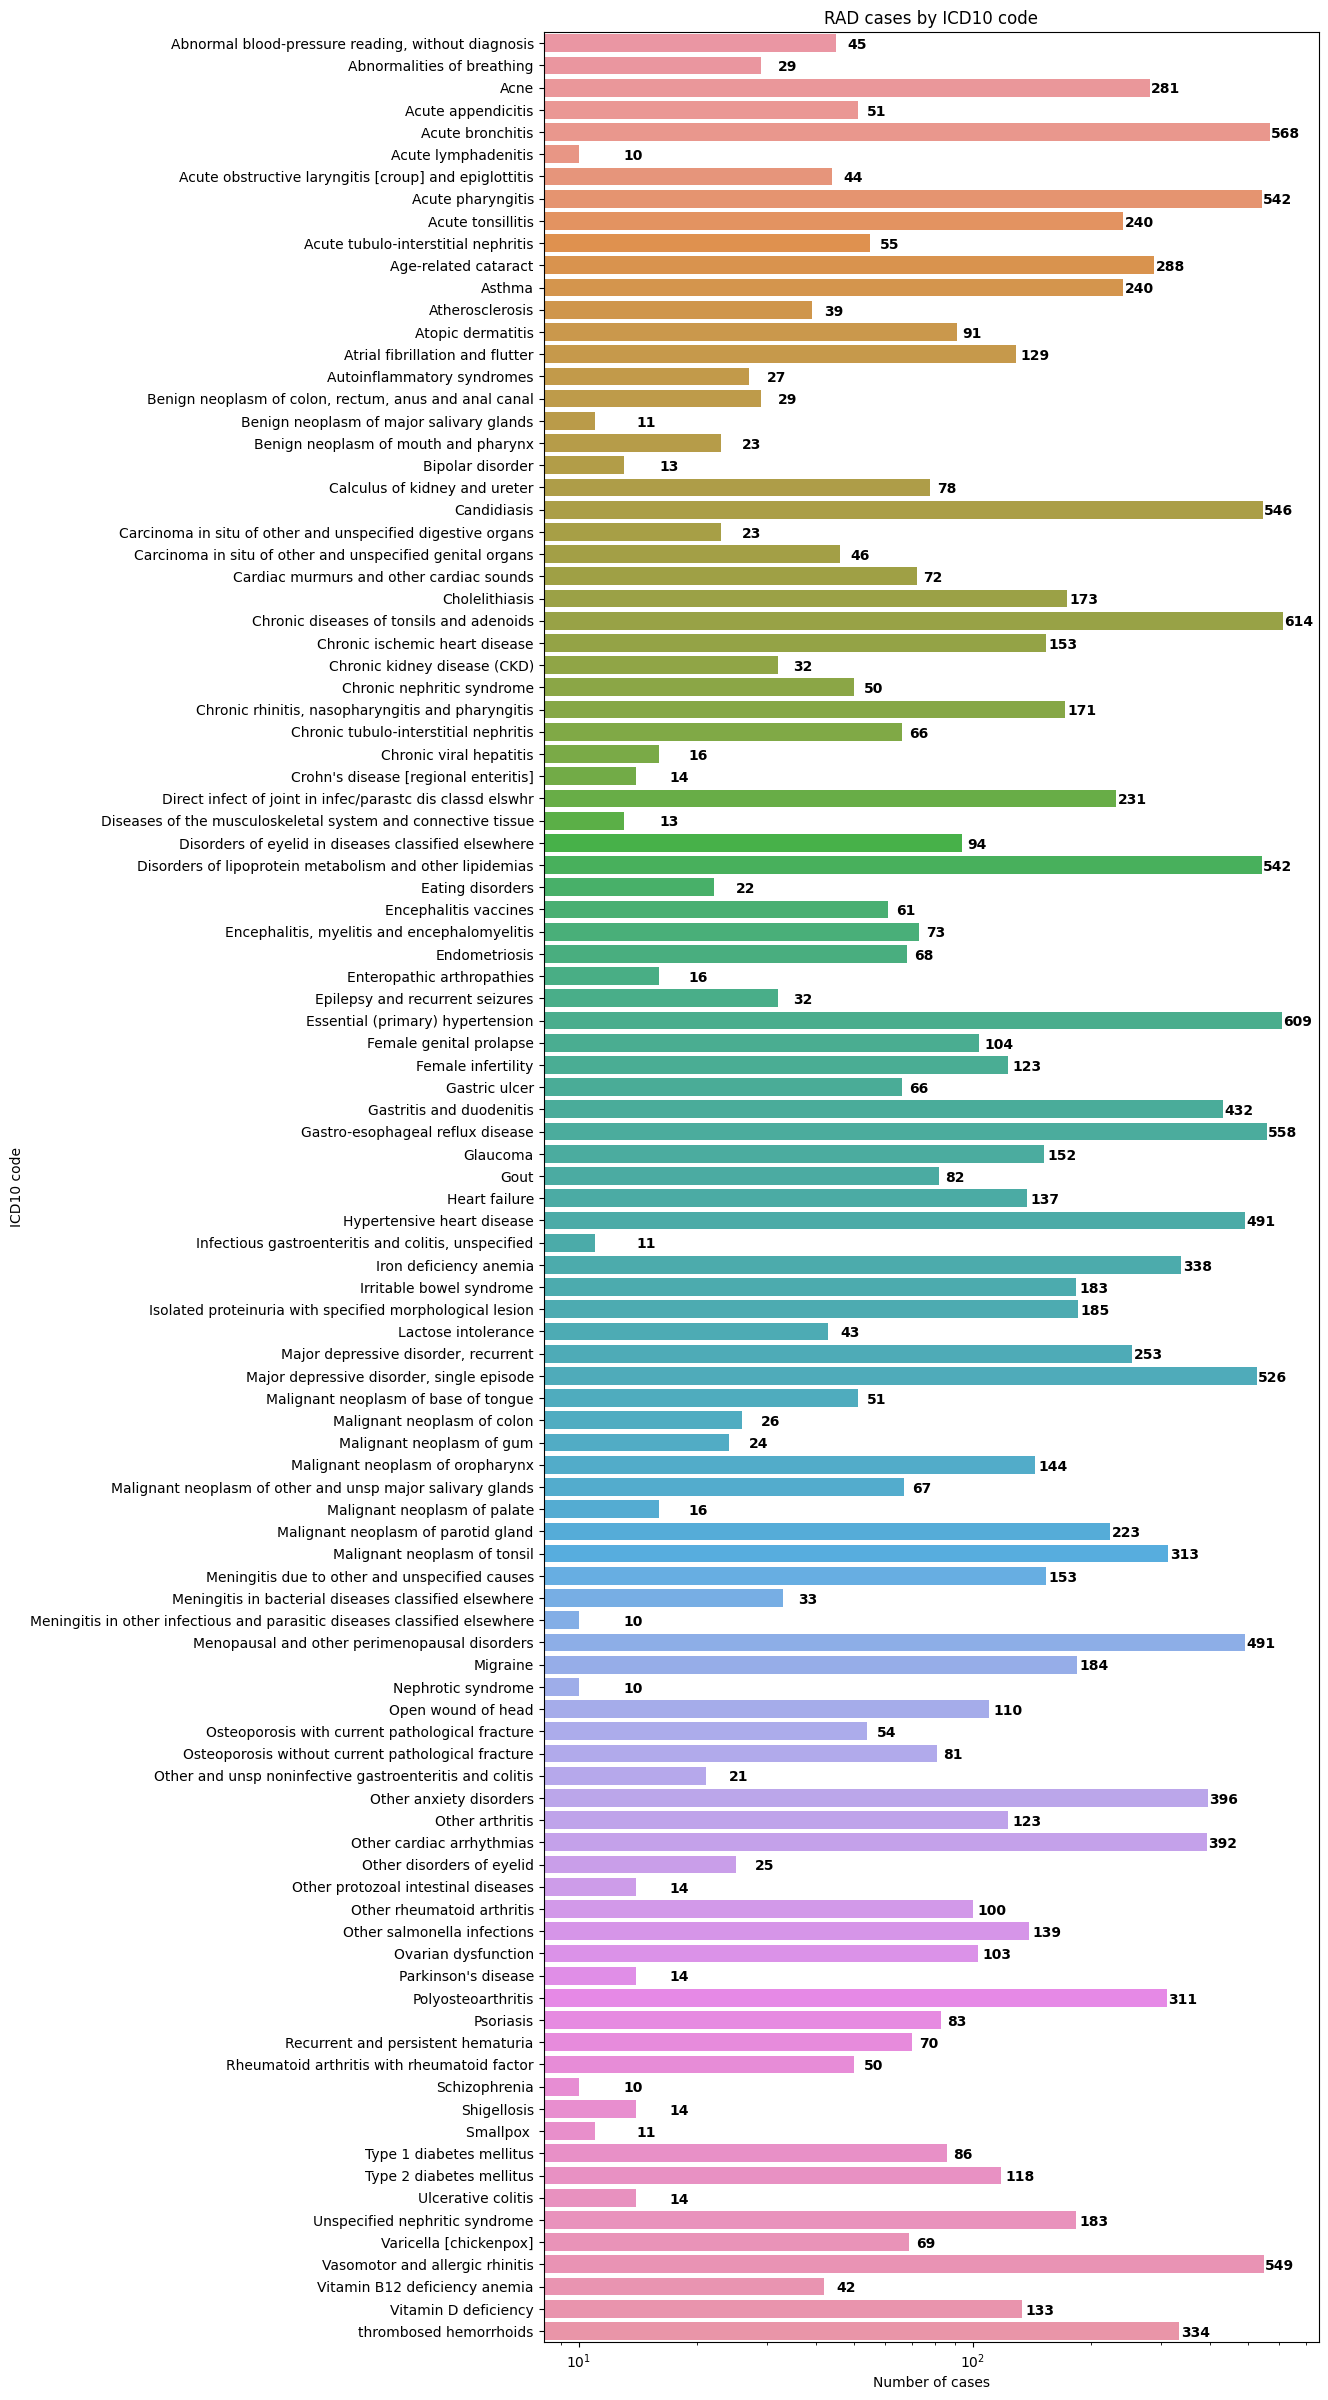

In [46]:
tops = pd.read_excel('results/RAD_counts_m1.xlsx')
tops.head(10)

# aggregate the cases data by ICD10_name
tops1 = tops.groupby(['ICD10_name']).sum()
tops1 = tops1.reset_index()

# plot horisontal barplot for tops['cases']
plt.figure(figsize=(10, 30))    
# log scale
plt.xscale('log')
sns.barplot(x='cases', y='ICD10_name', data=tops1)
# add numbers to the plot   
for i, v in enumerate(tops1['cases']):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.title('RAD cases by ICD10 code')
plt.xlabel('Number of cases')
plt.ylabel('ICD10 code')

plt.savefig('results/RAD_cases_by_ICD10_code.png', dpi=300, bbox_inches='tight')
plt.savefig('results/RAD_cases_by_ICD10_code.svg')

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_54318/1477711281.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tops2 = tops.groupby(['type']).sum()


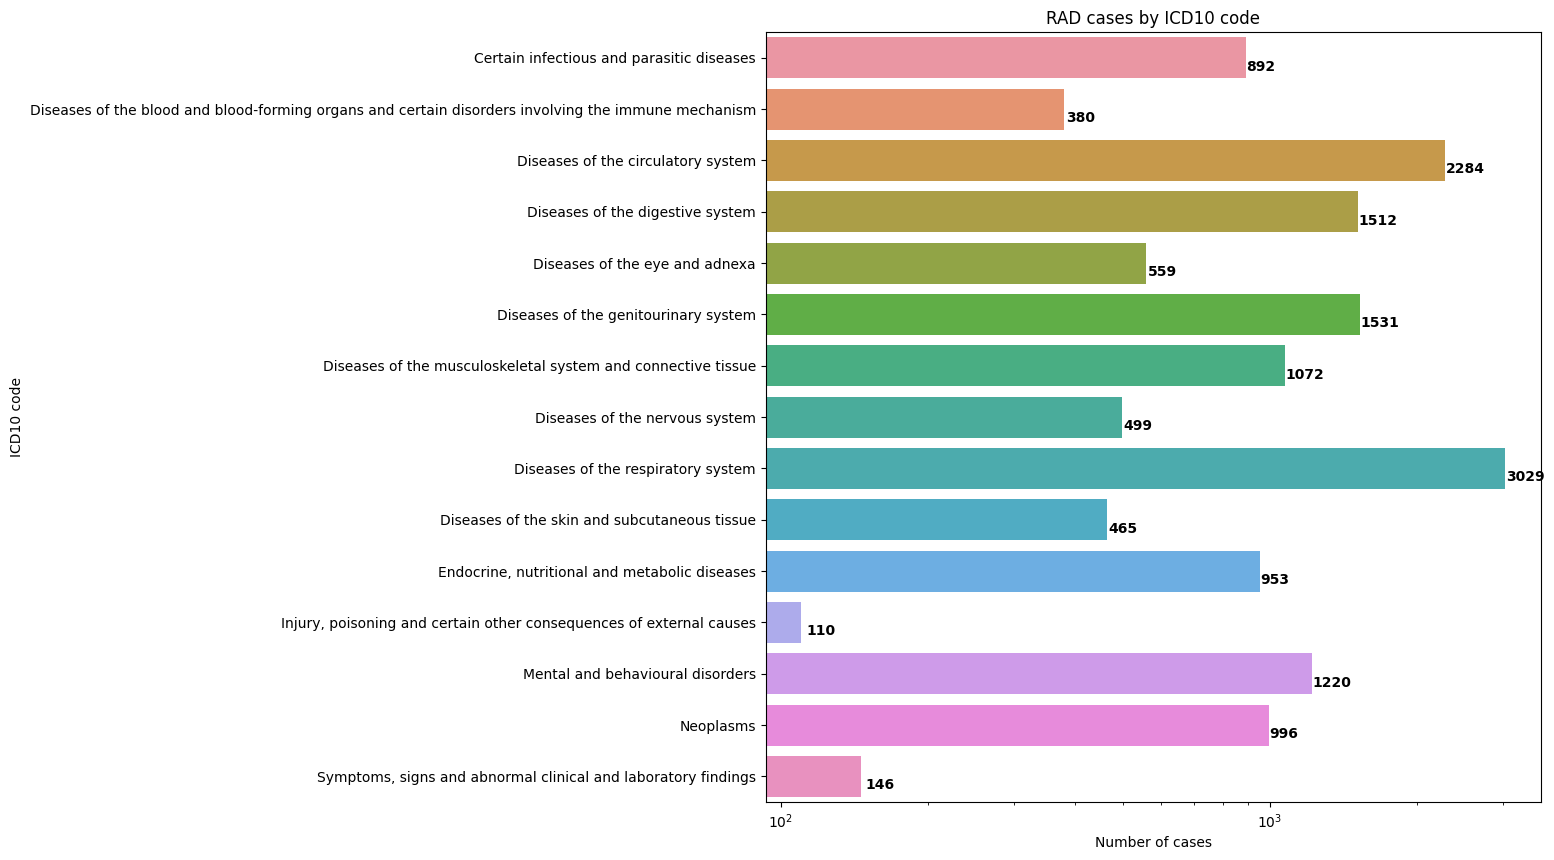

In [44]:
tops = pd.read_excel('results/RAD_counts_m1.xlsx')
tops.head(10)

# aggregate the cases data by ICD10_name
tops2 = tops.groupby(['type']).sum()
tops2 = tops2.reset_index()

# plot horisontal barplot for tops['cases']
plt.figure(figsize=(10, 10))    
# log scale
plt.xscale('log')
sns.barplot(x='cases', y='type', data=tops2)
# add numbers to the plot   
for i, v in enumerate(tops2['cases']):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.title('RAD cases by ICD10 code')
plt.xlabel('Number of cases')
plt.ylabel('ICD10 code')

plt.savefig('results/RAD_cases_by_ICD10_types.png', dpi=300, bbox_inches='tight')
plt.savefig('results/RAD_cases_by_ICD10_types.svg')

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_54318/3868154845.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tops3 = tops3a.groupby(['ICD10_name']).sum()


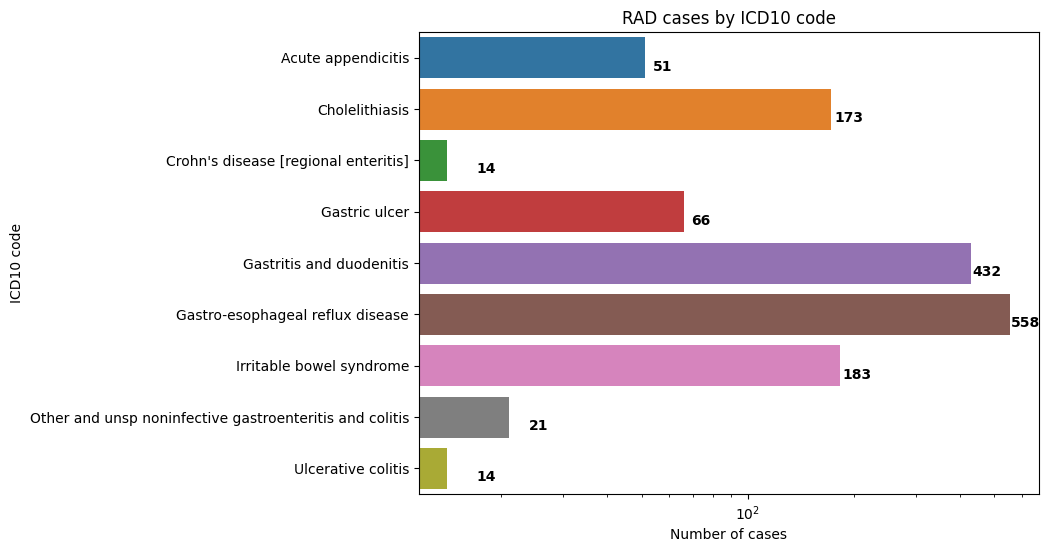

In [51]:
# aggregate the cases data by ICD10_name
tops3a = tops[tops['type'] == 'Diseases of the digestive system']
tops3 = tops3a.groupby(['ICD10_name']).sum()
tops3 = tops3.reset_index()

# plot horisontal barplot for tops['cases']
plt.figure(figsize=(8, 6))    
# log scale
plt.xscale('log')
sns.barplot(x='cases', y='ICD10_name', data=tops3)
# add numbers to the plot   
for i, v in enumerate(tops3['cases']):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.title('RAD cases by ICD10 code')
plt.xlabel('Number of cases')
plt.ylabel('ICD10 code')

plt.savefig('results/RAD_cases_digestive_system.png', dpi=300, bbox_inches='tight')
plt.savefig('results/RAD_cases_digestive_system.svg')

## Form potential case-controls group by disease

In [26]:
# Asthma
icd = 'J45'

### Form groups based on main characters only

In [92]:
case = df[df[icd] == 1]
case = case[['skood', 'gender', 'Age_at_MBsample', 'BMI', 'antibiotics']]
case = case.dropna()

case.to_excel('results/'+str(icd)+'_case.xlsx')

case.head(2)

,skood,gender,Age_at_MBsample,BMI,antibiotics
11,EGVD008055,1,42.0,29.87,Not in the last year
34,EGVD038423,1,69.0,30.90,Not in the last year


In [82]:
cntr1 = df[df[icd] != 1]
cntr1 = cntr1[['skood', 'gender', 'Age_at_MBsample', 'BMI', 'antibiotics']]
cntr1 = cntr1.dropna()
cntr1.head(2)

,skood,gender,Age_at_MBsample,BMI,antibiotics
0,EGVD049674,1,35.0,20.24,Not in the last year
1,EGVD046120,1,36.0,18.89,In the last 6 months


In [95]:
# all vs all
selected_rows = []

for index, row_df1 in case.iterrows():
    # Filter df2 to rows with different names
    filtered_df2 = cntr1[cntr1['skood'] != row_df1['skood']]
    
    # Calculate pairwise distances using age, bmi, and weight
    distances = pairwise_distances(
        filtered_df2[['gender', 'Age_at_MBsample', 'BMI']],
        [row_df1[['gender', 'Age_at_MBsample', 'BMI']]],
        metric='euclidean'
    )
    
    # Get the index of the row with the minimum distance
    min_distance_idx = distances.argmin()
    
    # Add the selected row to the list
    selected_rows.append(filtered_df2.iloc[min_distance_idx])

# Create a new DataFrame from the selected rows
cntr = pd.DataFrame(selected_rows)
#cntr

In [96]:
selected_rows = []

for index, row_df1 in case.iterrows():
    # Filter df2 to rows with different names
    filtered_df2 = cntr1[cntr1['skood'] != row_df1['skood']]
    
    # Calculate pairwise distances using age, bmi, and weight
    distances = pairwise_distances(
        filtered_df2[['gender', 'Age_at_MBsample', 'BMI']],
        [row_df1[['gender', 'Age_at_MBsample', 'BMI']]],
        metric='euclidean'
    )
    
    # Get the index of the row with the minimum distance
    min_distance_idx = distances.argmin()
    
    # Add the selected row to the list
    selected_rows.append(filtered_df2.iloc[min_distance_idx])

    # Update df2 by dropping the selected row
    cntr1 = cntr1.drop(filtered_df2.index[min_distance_idx])

# Create a new DataFrame from the selected rows
cntr_it = pd.DataFrame(selected_rows)

cntr_it.to_excel('results/'+str(icd)+'_cntr.xlsx')

## Check final groups similarity

(array([ 56.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 183.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

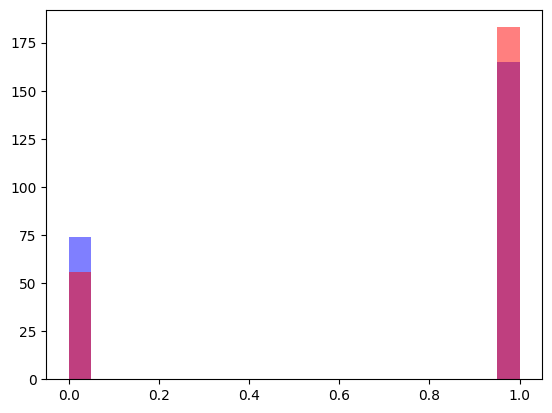

In [97]:
plt.hist(cntr_it['gender'], bins=20, alpha=0.5, label='cntr', color='blue')
plt.hist(case['gender'], bins=20, alpha=0.5, label='case', color='red')